<a href="https://colab.research.google.com/github/Arathi98/TCS_PROJECT_ARATHI/blob/main/ARATHIMV_TCS_PROJECT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TCS -ION RIO- 125 Classification Model - Build a Model that Classifies the Side Effects of a Drug**

**Objective**

To build a classification model using Machine learning techniques that classifies the side effects of a particular drug by Age, Race and Gender.

**Dataset Description**
​

**DataSet Used**:DRUGS_SIDE_EFFECTS_DATASET.csv
​

There are 6 columns or features describes the dataset.They are:
   
    1.NAME         :Name of user
    2.AGE          :Age of user
    3.DRUG NAME    :Name Of drug
    4.GENDER       :Gender of user
    5.RACE         :Race to which the user belongs
    6.SIDE EFFECTS :Level of side effects associated with drug

importing necessary libraries

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

reading dataset

In [4]:
df=pd.read_csv("DRUGS_SIDE_EFFECTS_DATASET.csv")

In [5]:
df.head()

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,Aaban,M,topamax,41.0,White,Mild Side Effects
1,Aaban,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,Aabha,F,tazorac,31.0,White,Mild Side Effects
3,Aabha,F,voltaren,44.0,White,Severe Side Effects
4,Aabid,M,tramadol,24.0,White,No Side Effects


In [6]:
df.shape

(21475, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21475 entries, 0 to 21474
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NAME          21475 non-null  object 
 1   GENDER        21474 non-null  object 
 2   DRUG NAME     21474 non-null  object 
 3   AGE           21474 non-null  float64
 4   RACE          21474 non-null  object 
 5   SIDE EFFECTS  21474 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1006.8+ KB


In [8]:
df.describe()

,AGE
count,21474.000000
mean,41.471035
std,12.402294
min,15.000000
25%,31.000000
50%,41.000000
75%,51.000000
max,300.000000


In [9]:
df.describe()

,AGE
count,21474.000000
mean,41.471035
std,12.402294
min,15.000000
25%,31.000000
50%,41.000000
75%,51.000000
max,300.000000


In [10]:
df.isna().sum()

NAME            0
GENDER          1
DRUG NAME       1
AGE             1
RACE            1
SIDE EFFECTS    1
dtype: int64

In [11]:
df.nunique()

NAME            7772
GENDER             2
DRUG NAME        406
AGE               61
RACE               9
SIDE EFFECTS       5
dtype: int64

# EDA

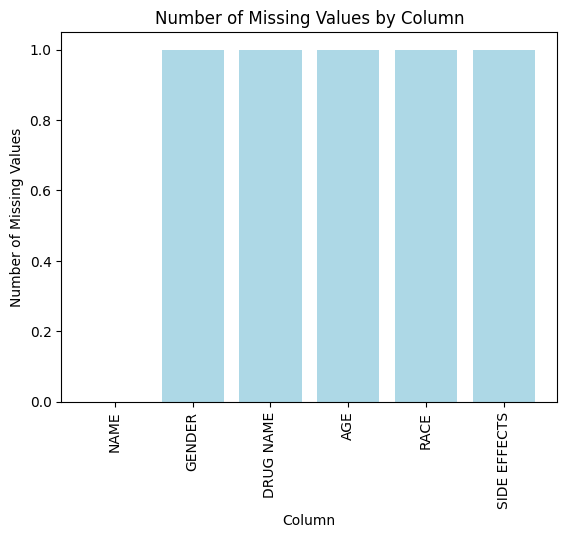

In [12]:
null_counts = df.isna().sum()
plt.bar(null_counts.index, null_counts.values,color="lightblue")
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.title('Number of Missing Values by Column')
plt.xticks(rotation=90)
plt.show()

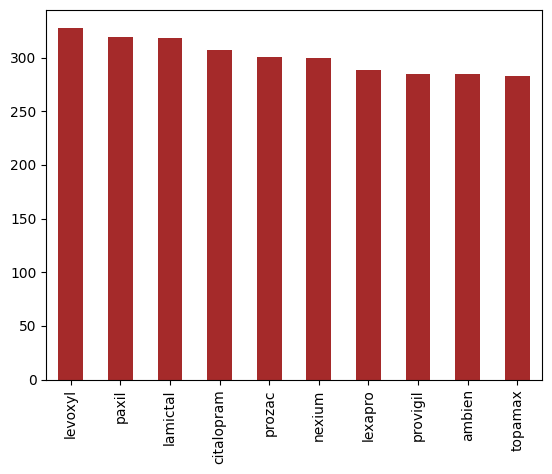

In [13]:
df["DRUG NAME"].value_counts().head(10).plot(kind="bar",color='brown')
plt.show()

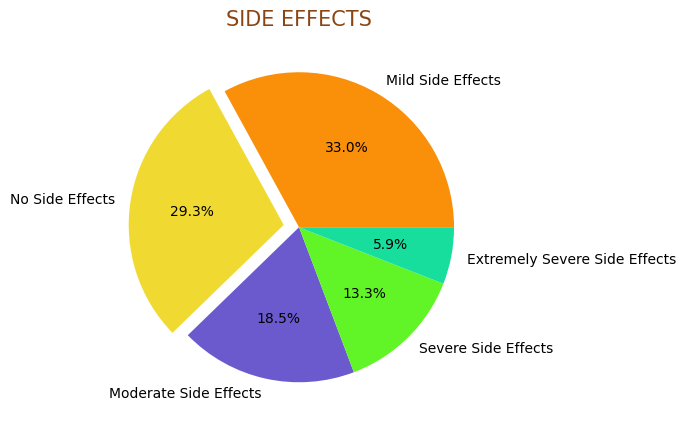

In [14]:
label=df["SIDE EFFECTS"].value_counts().index
count=df["SIDE EFFECTS"].value_counts().values
color = ['#FA8F0A','#F0DA32','slateblue','#61F527','#18DE9D']
explode = (0, 0.1, 0, 0, 0)
plt.figure(1, figsize=(5,10))
plt.pie(count, labels=label, colors=color, autopct='%1.1f%%', explode=explode)
plt.title("SIDE EFFECTS",color="saddlebrown",fontsize=15)
plt.show()

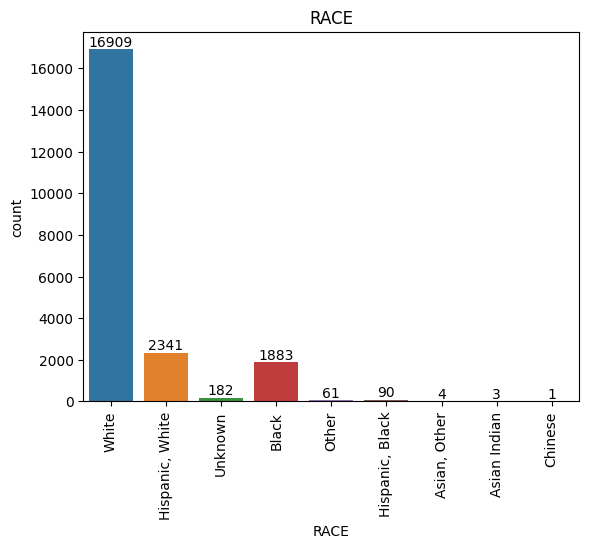

In [15]:
ax = sns.countplot(data = df,x='RACE')
plt.title('RACE')
x = ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)

plt.show()

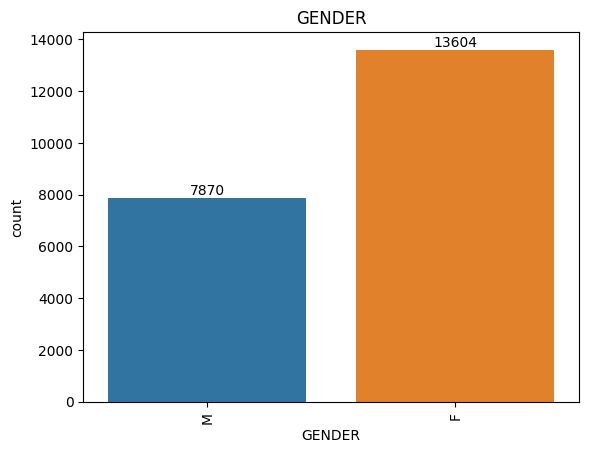

In [16]:
ax = sns.countplot(data = df,x='GENDER')
plt.title('GENDER')
x = ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)

plt.show()

Text(0, 0.5, 'Range')

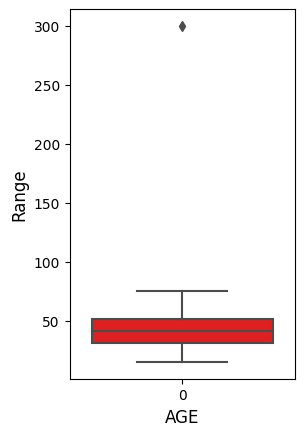

In [17]:
plt.subplot(1, 2, 1)
sns.boxplot(df['AGE'], color = 'red')
plt.xlabel('AGE', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

In [18]:
#BIVARIATE ANALYSIS

<Figure size 1200x1000 with 0 Axes>

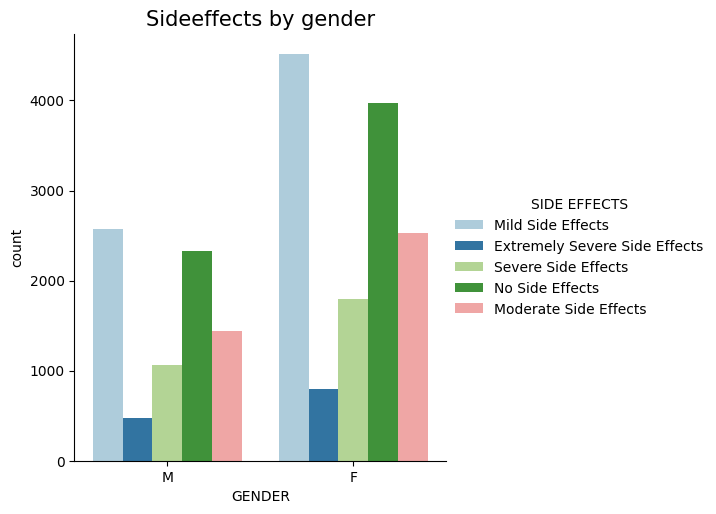

In [19]:
plt.figure(figsize=(12, 10))
sns.catplot(x ='GENDER', hue='SIDE EFFECTS', kind='count', data=df, palette='Paired')
plt.title('Sideeffects by gender', fontsize = 15)
plt.show()

<Figure size 1200x1000 with 0 Axes>

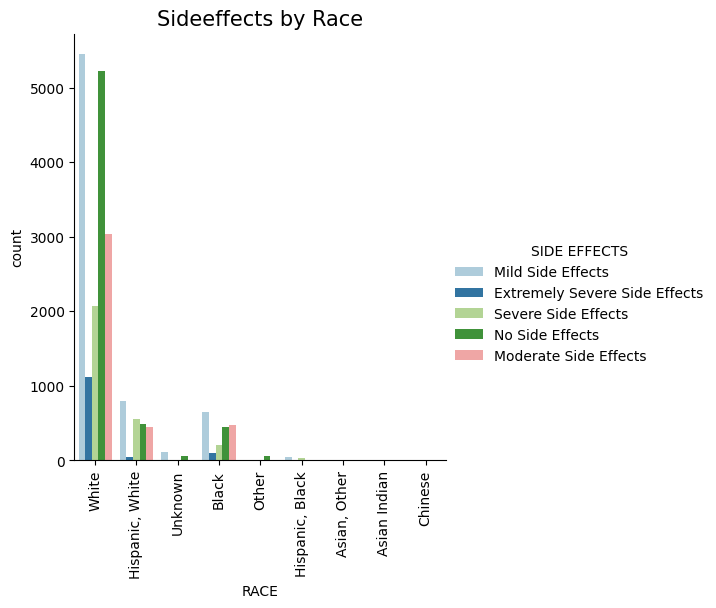

In [20]:
plt.figure(figsize=(12, 10))
sns.catplot(x ='RACE', hue='SIDE EFFECTS', kind='count', data=df, palette='Paired')
plt.title('Sideeffects by Race', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

#Data Preprocessing

removing outliers

In [22]:
for i in ['AGE']:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR=Q3-Q1
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR
    df[i].where(df[i] > lower_limit, lower_limit, inplace = True)
    df[i].where(df[i] < upper_limit, upper_limit, inplace = True)

Text(0, 0.5, 'Range')

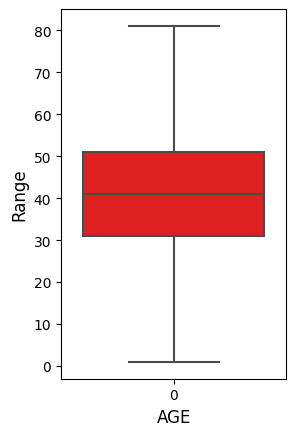

In [23]:
plt.subplot(1, 2, 1)
sns.boxplot(df['AGE'], color = 'red')
plt.xlabel('AGE', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

Treating nullvalues

In [25]:
df['AGE'].fillna(df['AGE'].median(), inplace = True)
df.isnull().sum()

NAME            0
GENDER          1
DRUG NAME       1
AGE             0
RACE            1
SIDE EFFECTS    1
dtype: int64

Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import HashingVectorizer



In [28]:
df = df.drop('NAME', axis=1)

In [29]:
#Encode Categorical Variables
label_encoder = LabelEncoder()
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])
df['RACE'] = label_encoder.fit_transform(df['RACE'])
df['SIDE EFFECTS'] = label_encoder.fit_transform(df['SIDE EFFECTS'])
df['DRUG NAME'] = label_encoder.fit_transform(df['DRUG NAME'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21475 entries, 0 to 21474
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GENDER        21475 non-null  int64  
 1   DRUG NAME     21475 non-null  int64  
 2   AGE           21475 non-null  float64
 3   RACE          21475 non-null  int64  
 4   SIDE EFFECTS  21475 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 839.0 KB


array([[<Axes: title={'center': 'AGE'}>]], dtype=object)

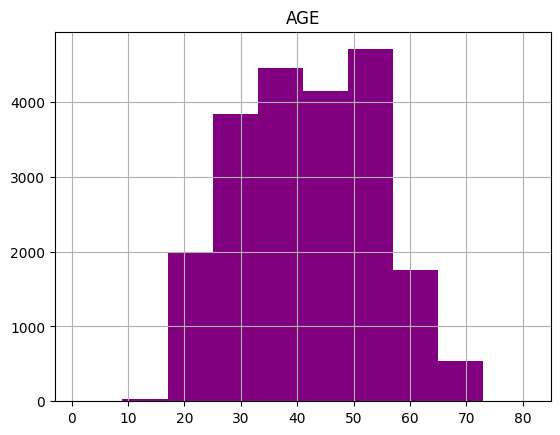

In [31]:
df.hist(column='AGE',color='purple')

<Axes: >

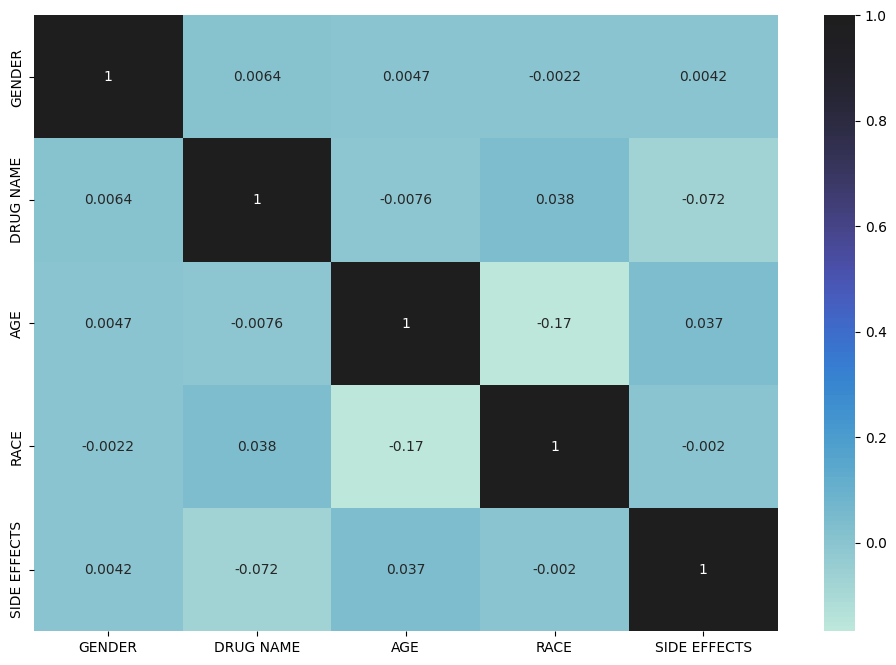

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(df, columns=df.columns).corr(), annot=True, center=True)

Splitting features into independent and dependent set

In [33]:
X = df.drop(['SIDE EFFECTS'], axis=1)
y = df['SIDE EFFECTS']


Train test split

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Modelling

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_score

Logistic Regression
33.247962747380676
[[   0  202    0   74    0]
 [   0 1073    0  372    0]
 [   0  625    0  170    0]
 [   0  869    0  355    0]
 [   0  380    0  175    0]]


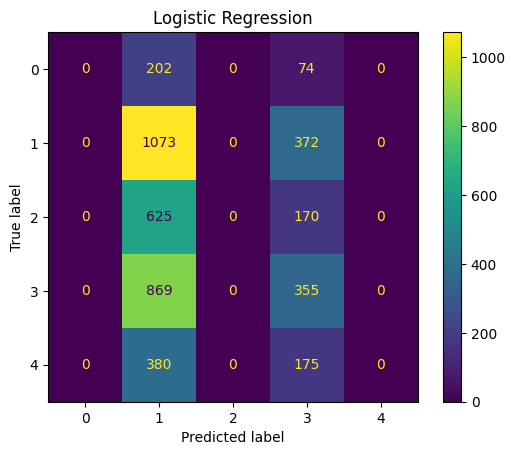

Random Forset Classifier
93.55064027939464
[[ 257    5    1   10    3]
 [  12 1353   28   42   10]
 [   1   39  726   19   10]
 [   7   43   17 1149    8]
 [   0    8    3   11  533]]


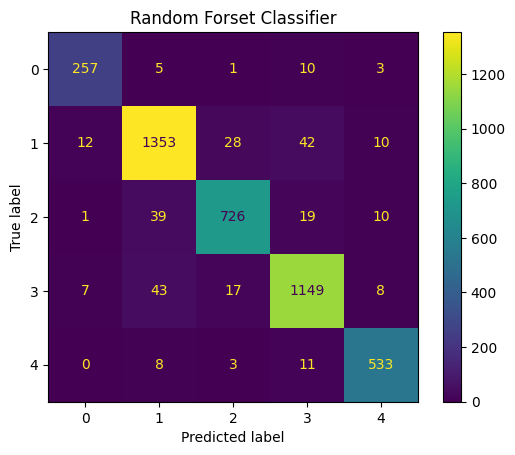

KNeighbors Classifier
92.85215366705472
[[ 252   11    2    9    2]
 [  17 1346   20   49   13]
 [   5   31  734   17    8]
 [   9   48   22 1139    6]
 [   1   13    7   17  517]]


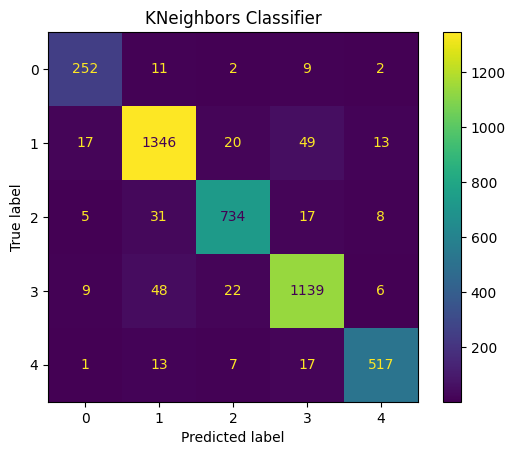

Gradient Boosting Classifier
77.0663562281723
[[ 184   62   11   16    3]
 [   2 1193   42  184   24]
 [   9  180  514   85    7]
 [   1  144   13 1055   11]
 [   1  124   11   55  364]]


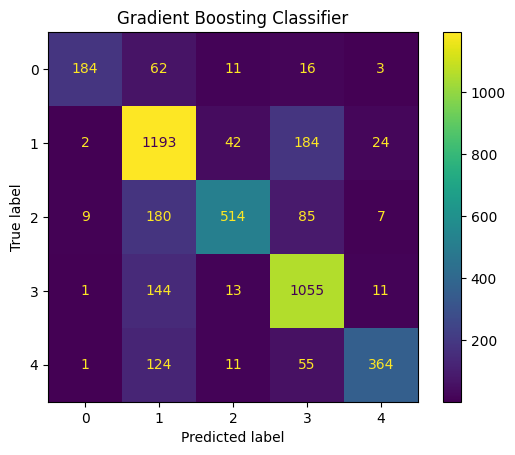

Support Vector Machines
41.07101280558789
[[   0  140    8  128    0]
 [   0 1040   20  380    5]
 [   0  437  108  233   17]
 [   0  610   36  575    3]
 [   0  264    8  242   41]]


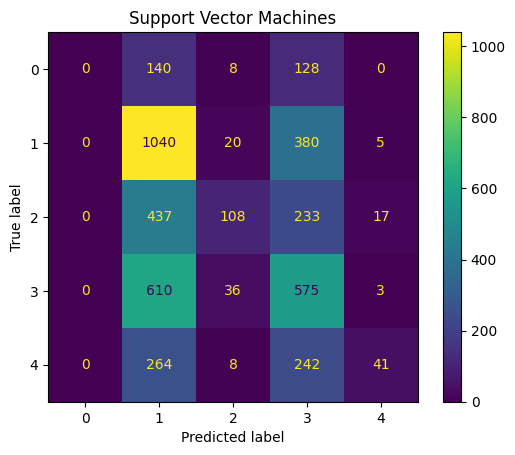

Decision Tree
92.59604190919674
[[ 237    4    2   31    2]
 [  18 1350   30   40    7]
 [   4   40  709   22   20]
 [  13   37   18 1146   10]
 [   2   11    3    4  535]]


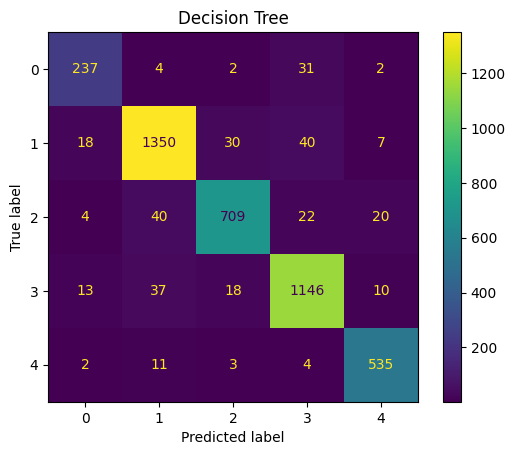

AdaBoost Classifier
20.372526193247964
[[136   0  22  61  57]
 [585 148  30 409 273]
 [337  46  90 188 134]
 [517  84  25 412 186]
 [255  11  25 175  89]]


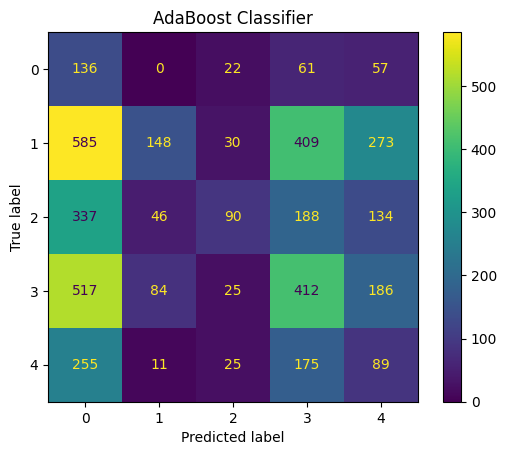

In [38]:
value= [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(),GradientBoostingClassifier(),SVC(),DecisionTreeClassifier(), AdaBoostClassifier()]

key= ['Logistic Regression', 'Random Forset Classifier',   'KNeighbors Classifier','Gradient Boosting Classifier','Support Vector Machines','Decision Tree','AdaBoost Classifier']

models= dict(zip(key,value))
accuracy_scores=[]
for key,value in models.items():
    value.fit(X_train,y_train)
    y_pred= value.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(key)
    print(accuracy*100)
    conf = confusion_matrix(y_test, y_pred)
    print(conf)
    ConfusionMatrixDisplay(confusion_matrix=conf).plot()
    plt.title(key)
    plt.show()

Feature selection

In [39]:

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=4)  # Set the desired number of features to retain

# Fit RFE on the data and get the rankings of the features
rfe.fit(X, y)
feature_ranking = pd.Series(rfe.ranking_, index=X.columns).sort_values()

# Print the feature rankings
print("Feature Rankings:")
print(feature_ranking)




Feature Rankings:
GENDER       1
DRUG NAME    1
AGE          1
RACE         1
dtype: int64


In [40]:
selected_features = X.columns[rfe.support_].tolist()


print("Selected Features:",selected_features)




Selected Features: ['GENDER', 'DRUG NAME', 'AGE', 'RACE']


Cross Validation

In [47]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=20)
model=RandomForestClassifier()
scores=cross_val_score(model,X,y,cv=skfold)
print(scores)
print(np.mean(scores))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=20.
  warnings.warn(


[0.97299814 0.96741155 0.96182495 0.95158287 0.94785847 0.95437616
 0.96182495 0.97672253 0.95530726 0.94413408 0.94040968 0.94227188
 0.94227188 0.94040968 0.9310987  0.96178938 0.95060578 0.95806151
 0.95806151 0.95246971]
0.9535745338866125


Hyperparameter tuning

In [43]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
model = RandomForestClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 300],                # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],           # Number of features to consider at each split
    'max_depth': [5, 10, 20, 30],                    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                       # Minimum number of samples required to be at a leaf node
    'criterion':['entropy','gini']
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, random_state=0)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters:", random_search.best_params_)

# Get the best model based on the random search
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", accuracy)
from sklearn.metrics import accuracy_score
Y_pred=best_model.predict(X_test)
print(confusion_matrix(y_test,Y_pred))
print(accuracy_score(y_test,Y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'`

Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy'}
Test Set Accuracy: 0.9357392316647264
[[ 248    9    0   17    2]
 [  12 1355   26   40   12]
 [   1   26  736   23    9]
 [   6   40   19 1150    9]
 [   1   10    4   10  530]]
0.9357392316647264


Concludes the best model that classifies the side effects of a particular drug by Age, Race and Gender, is the RandomForestClassifier